# **Part1: Run an already implemented agent on a simple environment using RLax and Bsuite**

---



Some basic learning problems:
 We begin with a collection of very simple decision problems, and standard analysis that confirms an agent’s competence at learning a rewarding policy within them.

**Simple bandit**

In [ ]:
#set-up
!git clone https://github.com/deepmind/bsuite.git
!pip install -q bsuite/
import bsuite
from bsuite import sweep

fatal: destination path 'bsuite' already exists and is not an empty directory.
  Preparing metadata (setup.py) ... done


**Loading enviroment:**
environment implements the dm_env agent-environment interface:
the main interaction with an environment is via the step() method: step() takes an discrete action index as input and returns a TimeStep namedtuple TimeStep contains the fields step_type, reward, discount, and observation.

In [ ]:
env = bsuite.load_from_id("bandit/0")

Loaded bsuite_id: bandit/0.


Run random agent(does not learn) in Simple Bandit environment

In [ ]:
import numpy as np
SAVE_PATH_RAND = '/content/bsuite/rand'
env = bsuite.load_and_record('bandit/0', save_path=SAVE_PATH_RAND)

for episode in range(env.bsuite_num_episodes):
  timestep = env.reset()
  while not timestep.last():
    action = np.random.choice(env.action_spec().num_values)
    timestep = env.step(action)

Loaded bsuite_id: bandit/0.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.


In [ ]:
def run_random_agent(bsuite_id, save_path=SAVE_PATH_RAND, overwrite=True):
  """Evaluates a random agent experiment on a single bsuite_id."""
  env = bsuite.load_and_record(bsuite_id, save_path, overwrite=overwrite)
  for episode in range(env.bsuite_num_episodes):
    timestep = env.reset()
    while not timestep.last():
      action = np.random.choice(env.action_spec().num_values)
      #my very native random action selection agent, doesn't learn anything
      timestep = env.step(action)
  return

for bsuite_id in sweep.BANDIT:
  run_random_agent(bsuite_id)

Loaded bsuite_id: bandit/0.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/1.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/2.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/3.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/4.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/5.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/6.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/7.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/8.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.
Loaded bsuite_id: bandit/9.
Logging results to CSV file for each bsuite_id in /content/bsuite/rand.


Some results and Analysis:

In [ ]:
import collections.abc
collections.Mapping = collections.abc.Mapping
from bsuite.logging import csv_load
DF, _ = csv_load.load_bsuite(SAVE_PATH_RAND)
DF.head()

,steps,episode,total_return,episode_len,episode_return,total_regret,bsuite_id,results_dir,bsuite_env,mapping_seed,...,seed,reward_scale,height_threshold,x_reward_threshold,size,memory_length,num_bits,n_distractor,chain_length,agent_name
0,1,1,1.0,1,1.0,0.0,bandit/5,/content/bsuite/rand,bandit,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/bsuite/rand
1,2,2,1.2,1,0.2,0.8,bandit/5,/content/bsuite/rand,bandit,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/bsuite/rand
2,3,3,1.5,1,0.3,1.5,bandit/5,/content/bsuite/rand,bandit,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/bsuite/rand
3,4,4,2.4,1,0.9,1.6,bandit/5,/content/bsuite/rand,bandit,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/bsuite/rand
4,5,5,3.2,1,0.8,1.8,bandit/5,/content/bsuite/rand,bandit,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/content/bsuite/rand


In [ ]:
from bsuite.experiments import summary_analysis
BSUITE_SCORE = summary_analysis.bsuite_score(DF)
BSUITE_SCORE

,bsuite_env,score,type,tags,finished
0,bandit,0.0,basic,"('basic',)",True


The random Agent does not learn, lets try some other agents from baselines.

In [ ]:
!pip install tensorflow
!pip install rlax
!pip install -q dm-sonnet
!pip install -q trfl
!pip install -U dm-haiku

In [ ]:
from bsuite.baselines import experiment
from bsuite.baselines.jax import dqn

SAVE_PATH_DQN = '/content/bsuite/dqn'
for bsuite_id in sweep.BANDIT:
  env = bsuite.load_and_record(bsuite_id, save_path=SAVE_PATH_DQN)
  agent = dqn.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
  )
  experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)

Loaded bsuite_id: bandit/0.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/1.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/2.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/3.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/4.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/5.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/6.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/7.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/8.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsuite_id: bandit/9.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn.
Loaded bsu

In [ ]:
experiments = {'dqn': SAVE_PATH_DQN, 'rand': SAVE_PATH_RAND}
DF, SWEEP_VARS = csv_load.load_bsuite(experiments)
for var in SWEEP_VARS:
  print(var, DF[var].unique())

agent_name ['dqn' 'rand']


In [ ]:
BSUITE_SCORE = summary_analysis.bsuite_score(DF, SWEEP_VARS)
BSUITE_SCORE

,agent_name,level_1,bsuite_env,score,type,tags,finished
0,dqn,0,bandit,0.933338,basic,"('basic',)",True
1,rand,0,bandit,0.000000,basic,"('basic',)",True


**Evalutaion:**
The score typically represents the efficiency with which the agent learns the optimal action.
In the bandit setting, for instance, an agent that quickly identifies and exploits the best bandit arm will achieve a score closer to 1, while an agent that struggles to do so will have a score closer to 0.

DQN, or Deep Q-Network, is a model-free, online, off-policy reinforcement learning method.

# ***Part2: modify the environment to include stochasticity and compare two agents in their ability to solve the problem.***

---

Load environment from the Bandit_noise experiment involves stochasticity. Specifically, Bandit_noise tests an agent's ability to learn about multiple bandit arms in the presence of stochastic rewards. The term "stochastic" here refers to the randomness or unpredictability in the reward signals.

In this experiment, the agent needs to learn which arm of the bandit to pull in order to maximize its total reward, even though the rewards given by each arm are noisy (i.e., they have some randomness). The goal is to evaluate the agent's capability to explore the environment efficiently and exploit the best actions in the presence of uncertainty.

In a nutshell, the Bandit_noise setting introduces stochasticity in the rewards to challenge agents in the domain of exploration vs. exploitation under uncertainty.

In [ ]:
env = bsuite.load_from_id("bandit_noise/0")

Loaded bsuite_id: bandit_noise/0.


In [ ]:
SAVE_PATH_DQN_s = '/content/bsuite/dqn_s'
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_and_record(bsuite_id, save_path=SAVE_PATH_DQN_s)
  agent = dqn.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
  )
  experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)

Loaded bsuite_id: bandit_noise/0.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/1.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/2.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/3.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/4.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/5.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/6.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/7.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/8.
Logging results to CSV file for each bsuite_id in /content/bsuite/dqn_s.
Loaded bsuite_id: bandit_noise/9.
Log

In [ ]:
from bsuite.baselines import experiment
from bsuite.baselines.jax import actor_critic

SAVE_PATH_AC = '/content/bsuite/ac'
for bsuite_id in sweep.BANDIT_NOISE:
  env = bsuite.load_and_record(bsuite_id, save_path=SAVE_PATH_AC)
  agent = actor_critic.default_agent(
      obs_spec=env.observation_spec(),
      action_spec=env.action_spec()
  )
  experiment.run(agent, env, num_episodes=env.bsuite_num_episodes)


Loaded bsuite_id: bandit_noise/0.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/1.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/2.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/3.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/4.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/5.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/6.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/7.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/8.
Logging results to CSV file for each bsuite_id in /content/bsuite/ac.
Loaded bsuite_id: bandit_noise/9.
Logging results to CSV file fo

In [ ]:
experiments_s = {'dqn': SAVE_PATH_DQN_s, 'ac':SAVE_PATH_AC}
DF_s, SWEEP_VARS_s = csv_load.load_bsuite(experiments_s)
for var in SWEEP_VARS_s:
  print(var, DF_s[var].unique())

agent_name ['dqn' 'ac']


In [ ]:
BSUITE_SCORE_s = summary_analysis.bsuite_score(DF_s, SWEEP_VARS_s)
BSUITE_SCORE_s

,agent_name,level_1,bsuite_env,score,type,tags,finished
0,ac,0,bandit_noise,0.706311,noise,"('noise',)",True
1,dqn,0,bandit_noise,0.734663,noise,"('noise',)",True


tags=('noise',)


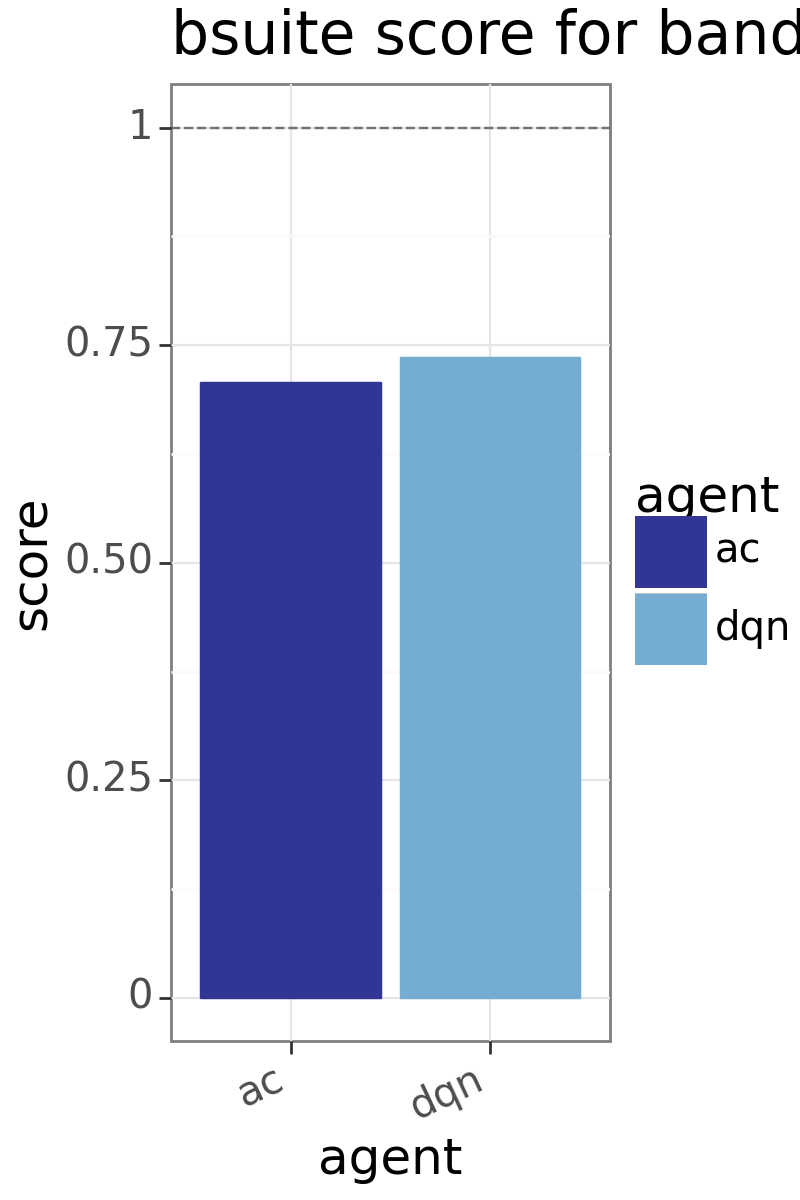

<Figure Size: (400 x 600)>

In [ ]:
bandit_noise_df = DF[DF.bsuite_env == 'bandit_noise'].copy()
summary_analysis.plot_single_experiment(BSUITE_SCORE_s, 'bandit_noise', SWEEP_VARS_s)

# **Deep sea**

---

